# Data Analysis : Ultimate Fighting Championship

In [1]:
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('fight_data.csv')

In [2]:
df.shape

(1477, 895)

In [3]:
df[['B_Name', 'R_Name', 'winner', 'B_Age', 'R_Age', 'winby', 'B_Location', 'R_Location','Date']].head(10)

,B_Name,R_Name,winner,B_Age,R_Age,winby,B_Location,R_Location,Date
0,Marvin Vettori,Antonio Carlos Junior,red,23.0,27.0,DEC,Mezzocorona Italy,"Coconut Creek, Florida United States",01/02/2017
1,Carlos Diego Ferreira,Colton Smith,blue,32.0,29.0,SUB,"Pharr, Texas USA","Fort Hood, TX USA",06/30/2014
2,Takanori Gomi,Joe Lauzon,red,38.0,32.0,KO/TKO,Tokyo Japan,"Bridgewater, Massachusetts USA",07/27/2015
3,Brandon Moreno,Louis Smolka,blue,23.0,25.0,SUB,Tijuana Mexico,"Kapolei, HI USA",10/03/2016
4,Elizabeth Phillips,Raquel Pennington,red,30.0,28.0,DEC,"Spokane, WA USA","Colorado Spring, Colorado United States",08/22/2016
5,Reza Madadi,Norman Parke,red,38.0,30.0,DEC,Stockholm Sweden,Bushmills Northern Ireland,10/26/2015
6,Shane Campbell,James Krause,red,30.0,30.0,DEC,"Kelowna, BC Canada","Lee's Summit, Missouri USA",02/22/2016
7,Johnny Case,Kazuki Tokudome,blue,27.0,30.0,SUB,"Jefferson, Iowa USA",Tokyo Japan,09/22/2014
8,Justin Edwards,Joe Proctor,red,34.0,31.0,SUB,"Bellefontaine, Ohio USA","Bridgewater, Massachusetts USA",06/08/2015
9,Viscardi Andrade,Richard Walsh,blue,33.0,28.0,DEC,São Paulo Brazil,"North Shore , Sydney Australia",03/21/2016


## Data Description

 This data set contains every UFC fight from 2013 up to the second quarter of 2017. Each row represents a single fight. 
Data is organized by Blue vs Red. There are 1,477 rows and 895 columns. 
    
## Questions and Analysis
    
 1. Does age have an impact on performance?
 2. What is the average height of each weight division? Do taller fighters win more?
 3. Which states have the most winners by KO/TKO below age twenty seven located in the United States?

In [4]:
#this cell of code is creating new columns for the graphs used in the report.

#creating new columns, winners age and losers age
df['winners_age'] = np.where((df['winner'] == 'red'), df['R_Age'], df['B_Age'])
df['losers_age'] = np.where((df['winner'] == 'red'), df['B_Age'], df['R_Age'])

#fixing a few location formats, and creating new column, winners location
df.set_value(216, 'B_Location', 'Kapolei, Hawaii USA')
df.set_value(1336, 'R_Location', 'Kapolei, Hawaii USA')
df.set_value(1129, 'B_Location', 'Albuquerque, New Mexico United States')
df['winners_location'] = np.where((df['winner'] == 'red'), df['R_Location'], df['B_Location'])

#creating new column, weight division
conditions = [
    df['B_Weight'] <= 57, 
    df['B_Weight'] <= 62,
    df['B_Weight'] <= 66,
    df['B_Weight'] <= 70,
    df['B_Weight'] <= 77,
    df['B_Weight'] <= 84,
    df['B_Weight'] <= 93,
    df['B_Weight'] <= 123
]
weight_divisions = ['Flyweight', 'Bantamweight', 'Featherweight', 'Lightweight', 'Welterweight'
           , 'Middleweight', 'Light Heavyweight', 'Heavyweight']

df['weight_division'] = np.select(conditions, weight_divisions)

#creating new columns, Average_height, winnners height and losers height
df['Average_Height'] =  (df['B_Height'] + df['R_Height']) / 2
df['winners_height'] = np.where((df['winner'] == 'red'), df['R_Height'], df['B_Height'])
df['losers_height'] = np.where((df['winner'] == 'red'), df['B_Height'], df['R_Height'])

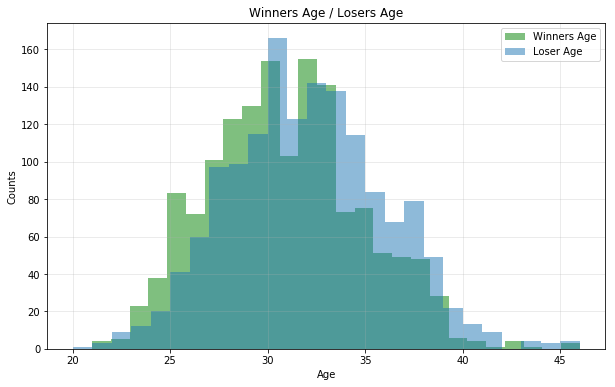

In [5]:
plt.figure(figsize=(10,6))
plt.hist(df['winners_age'].dropna(), alpha=.5, bins=26, color='g', label='Winners Age') 
plt.hist(df['losers_age'].dropna(), alpha=.5, bins=26, label='Loser Age') 
plt.title('Winners Age / Losers Age')
plt.legend(loc='upper right')
plt.ylabel('Counts')
plt.xlabel('Age')
plt.grid(alpha=.3)
plt.show()

### 1. Does age have an impact on performance?
    
I was expecting a larger differnce here, between losers age and winners age. I assume that the difference is small because this is a premier league. No matter their age the fighters are evenly matched. However, there is a noticeable difference, suggesting that young fighters win more fights. There is also a notable drop in winners age around the age of 33, and a spike in losers age around age 32. Which tells us that fighters tend to fall off in their early 30s.

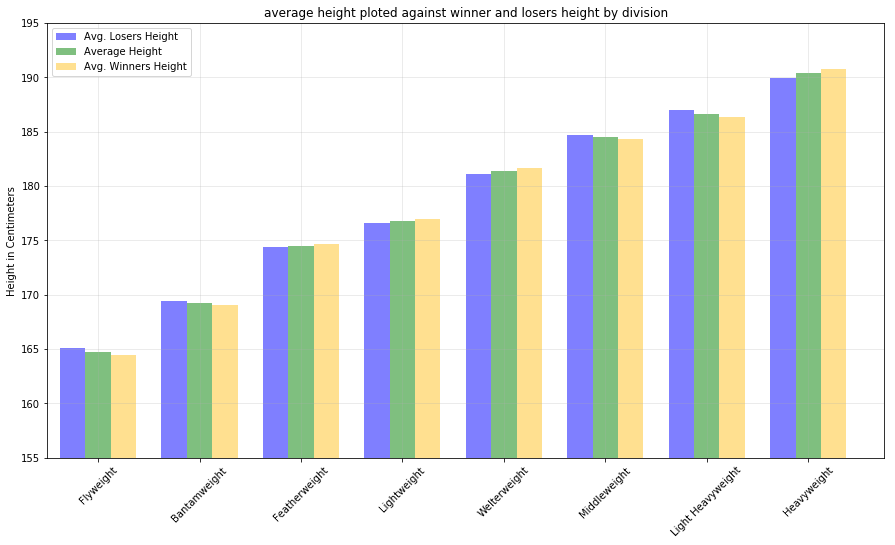

In [6]:
#Getting average height of each weight division, winners and losers, converting dataframe to list.
wddf = df.groupby(df['weight_division']).agg({np.mean})
avg_list = wddf['Average_Height']['mean'].tolist()
win_list = wddf['winners_height']['mean'].tolist()
lose_list = wddf['losers_height']['mean'].tolist()
lose_list.sort()
avg_list.sort()
win_list.sort()

#creating dataframe of values we found
raw_data = {'Division': weight_divisions,
        'losers_height': lose_list,
        'Average_Height': avg_list,
        'winners_height': win_list}
height_df = pd.DataFrame(raw_data, columns = ['Division', 'losers_height', 'Average_Height', 'winners_height'])

# Setting the positions and width for the bars
pos = list(range(len(height_df['losers_height']))) 
width = 0.25 

fig, ax = plt.subplots(figsize=(15,8))
plt.bar(pos, height_df['losers_height'], width, alpha=0.5, color='b') 
plt.bar([p + width for p in pos], height_df['Average_Height'], width, alpha=0.5, color='g') 
plt.bar([p + width*2 for p in pos], height_df['winners_height'], width, alpha=0.5, color='#FFC222') 

ax.set_title('average height ploted against winner and losers height by division')
ax.set_ylabel('Height in Centimeters')
ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(height_df['Division'])
plt.xlim(min(pos)-width, max(pos)+width*4)
ax.set_ylim([155,195])
plt.xticks(rotation=45)
plt.legend(['Avg. Losers Height', 'Average Height', 'Avg. Winners Height'], loc='upper left')
plt.grid(alpha=.3)
plt.show()

### 2. What is the average height of each weight division? Do taller fighters win more?
    
The difference between the three plotted averages is less than a centimeter in every division. So taller fighters don't 
win more. This is another instance of the league being a premeir league. Fighters are fighting in weight divisions they 
belong in.

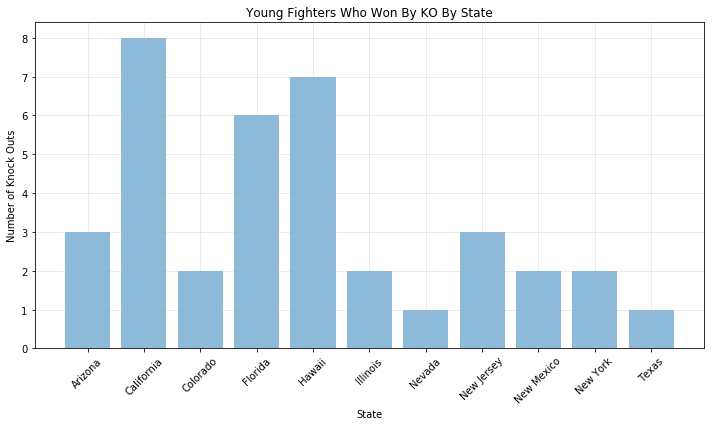

In [7]:
#Finding fighters whos' age is less than 27, live in the USA, and won a fight by TKO/KO
statesdf = df[(df['winners_age'] <= 26)
            & (df['winby'] == 'KO/TKO')
            & (df['winners_location'].str.contains("USA")==True)
            | (df['winners_location'].str.contains("United States")==True)
            & (df['winby'] == 'KO/TKO')
            & (df['winners_age'] <= 26)]

#turning off warning, false positive
pd.options.mode.chained_assignment = None  # default='warn'

#new column in our sliced dataframe, winners state
statesdf['winners_state'] = statesdf['winners_location'].apply(lambda x: re.search(",\s(New\s\w+|\w+)", x).group(0)[2:])

#Grouping by state and creating a count column.
newdf = statesdf['winners_state'].groupby(statesdf['winners_state']).agg({'count'})

x_pos = np.arange(len(newdf.index))
count = newdf['count'].tolist()

plt.figure(figsize=(12,6))
plt.bar(x_pos, count, align='center', alpha=0.5)
plt.xticks(x_pos, newdf.index)
plt.xticks(rotation=45)
plt.title('Young Fighters Who Won By KO By State')
plt.ylabel('Number of Knock Outs')
plt.xlabel('State')
plt.grid(alpha=.3)
plt.show()

### 3. Which states have the most winners by KO/TKO younger than twenty seven located in the United States?
    
California has the most fighters with knock out vicotries under the age of twenty seven with a result of eight victories. Followed closely by Hawaii and Florida with seven and six. I'm surprised a state like texas doesn't have more knock out wins.